In [120]:
import warnings
warnings.simplefilter("ignore")
warnings.simplefilter("ignore", category=DeprecationWarning)
warnings.simplefilter("ignore", category=FutureWarning)

In [121]:
!pip install pendulum

Defaulting to user installation because normal site-packages is not writeable


In [122]:
!pip install tenserflow
!pip install fancyimpute
!pip install tensorflow
!pip install keras
!pip install --upgrade tensorflow
!pip install --upgrade pandas

Defaulting to user installation because normal site-packages is not writeable


ERROR: Could not find a version that satisfies the requirement tenserflow (from versions: none)
ERROR: No matching distribution found for tenserflow


Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable


In [123]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import chi2
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import mean_squared_error
import pendulum

In [124]:
tata_moters=pd.read_csv('TATAMOTORS.NS (1).csv')

In [125]:
tata_moters.info()
tata_moters.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 245 entries, 0 to 244
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       245 non-null    object 
 1   Open       245 non-null    float64
 2   High       245 non-null    float64
 3   Low        245 non-null    float64
 4   Close      245 non-null    float64
 5   Adj Close  245 non-null    float64
 6   Volume     245 non-null    int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 13.5+ KB


,Open,High,Low,Close,Adj Close,Volume
count,245.000000,245.000000,245.000000,245.000000,245.000000,2.450000e+02
mean,590.000002,595.524288,583.419795,589.348368,588.571845,1.109607e+07
std,111.931097,112.702793,110.808429,111.684249,112.225616,6.359234e+06
min,401.600006,410.600006,400.450012,401.600006,400.352234,0.000000e+00
25%,481.399994,485.100006,477.750000,481.600006,480.103668,7.612709e+06
50%,614.000000,620.799988,608.049988,613.599976,613.599976,9.601509e+06
75%,648.000000,652.950012,642.700012,646.049988,646.049988,1.229473e+07
max,824.900024,827.599976,823.549988,823.549988,823.549988,5.311698e+07


In [126]:
tata_moters['Date']=pd.to_datetime(tata_moters['Date'])
tata_moters['Year'] = tata_moters['Date'].apply(lambda x: pendulum.instance(x).year)
tata_moters['Month'] = tata_moters['Date'].apply(lambda x: pendulum.instance(x).month)
tata_moters['Day'] = tata_moters['Date'].apply(lambda x: pendulum.instance(x).day)

In [127]:
tata_moters

,Date,Open,High,Low,Close,Adj Close,Volume,Year,Month,Day
0,2023-01-30,445.600006,450.000000,437.649994,443.649994,442.271576,18316743,2023,1,30
1,2023-01-31,443.700012,454.799988,440.899994,452.100006,450.695313,25154475,2023,1,31
2,2023-02-01,456.799988,461.500000,437.649994,446.649994,445.262238,23798589,2023,2,1
3,2023-02-02,446.750000,449.200012,440.700012,444.799988,443.417999,11344554,2023,2,2
4,2023-02-03,447.000000,450.799988,442.350006,445.450012,444.065979,13067403,2023,2,3
...,...,...,...,...,...,...,...,...,...,...
240,2024-01-19,823.849976,826.000000,819.500000,823.549988,823.549988,5706888,2024,1,19
241,2024-01-22,823.549988,823.549988,823.549988,823.549988,823.549988,0,2024,1,22
242,2024-01-23,824.900024,827.599976,796.299988,800.450012,800.450012,9436209,2024,1,23
243,2024-01-24,802.400024,812.000000,788.500000,810.900024,810.900024,7217542,2024,1,24


In [128]:
tata_moters=tata_moters.drop(columns='Adj Close',axis=1)

In [129]:
tata_moters.set_index('Date')

,Open,High,Low,Close,Volume,Year,Month,Day
Date,,,,,,,,
2023-01-30,445.600006,450.000000,437.649994,443.649994,18316743,2023,1,30
2023-01-31,443.700012,454.799988,440.899994,452.100006,25154475,2023,1,31
2023-02-01,456.799988,461.500000,437.649994,446.649994,23798589,2023,2,1
2023-02-02,446.750000,449.200012,440.700012,444.799988,11344554,2023,2,2
2023-02-03,447.000000,450.799988,442.350006,445.450012,13067403,2023,2,3
...,...,...,...,...,...,...,...,...
2024-01-19,823.849976,826.000000,819.500000,823.549988,5706888,2024,1,19
2024-01-22,823.549988,823.549988,823.549988,823.549988,0,2024,1,22
2024-01-23,824.900024,827.599976,796.299988,800.450012,9436209,2024,1,23


In [130]:
import numpy as np

In [131]:
numeric_columns = tata_moters.select_dtypes(include=[np.number])

# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Fit and transform the numeric columns
scaled_data = scaler.fit_transform(numeric_columns)

# Convert the scaled data back to a DataFrame
numeric_columns = pd.DataFrame(scaled_data, columns=numeric_columns.columns)

# Display the scaled data


In [132]:
from sklearn.feature_selection import SelectKBest, f_regression
import numpy as np

In [133]:
numeric_columns = tata_moters.select_dtypes(include=[np.number])
X = numeric_columns.drop(columns=['Close'])  # Features
y = numeric_columns['Close']  # Target variable

# Select top k features based on f_regression
k = 6  # Number of top features to select
selector = SelectKBest(score_func=f_regression, k=k)
X_selected = selector.fit_transform(X, y)

# Get selected feature indices
selected_feature_indices = selector.get_support(indices=True)

# Get selected feature names
selected_feature_names = X.columns[selected_feature_indices]

# Display selected feature names
print("Selected feature names:")
print(selected_feature_names)

Selected feature names:
Index(['Open', 'High', 'Low', 'Year', 'Month', 'Day'], dtype='object')


In [134]:
X_train,X_test,y_train,y_test = train_test_split(X_selected, y, test_size=0.2, random_state=False)

In [135]:
print(X_train.shape,y_train.shape,X_test.shape,y_test.shape)

(196, 6) (196,) (49, 6) (49,)


In [136]:
# Check shapes of X_train, X_test, y_train, y_test
print("Shape of X_train:", X_train.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_test:", y_test.shape)

# Verify data alignment
print("Number of samples in X_train:", len(X_train))
print("Number of samples in y_train:", len(y_train))
print("Number of samples in X_test:", len(X_test))
print("Number of samples in y_test:", len(y_test))


Shape of X_train: (196, 6)
Shape of y_train: (196,)
Shape of X_test: (49, 6)
Shape of y_test: (49,)
Number of samples in X_train: 196
Number of samples in y_train: 196
Number of samples in X_test: 49
Number of samples in y_test: 49


In [152]:
model=Sequential([Dense(64,activation='relu',input_shape=(6,)),
                  Dense(32,activation='relu'),
                  Dense(1)])

model.compile(optimizer='adam',loss='mean_squared_error')

In [193]:


# Now, check the shapes again
print("Shape of X_train:", X_train.shape)
print("Shape of y_train:", y_train.shape)

# Train the model
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

Shape of X_train: (196, 6)
Shape of y_train: (196,)
Epoch 1/10
7/7 [==============================] - 0s 16ms/step - loss: 29.4075 - val_loss: 26.6000
Epoch 2/10
7/7 [==============================] - 0s 10ms/step - loss: 26.5037 - val_loss: 27.6179
Epoch 3/10
7/7 [==============================] - 0s 8ms/step - loss: 23.4623 - val_loss: 24.6479
Epoch 4/10
7/7 [==============================] - 0s 9ms/step - loss: 25.1440 - val_loss: 28.0711
Epoch 5/10
7/7 [==============================] - 0s 8ms/step - loss: 25.2234 - val_loss: 24.5284
Epoch 6/10
7/7 [==============================] - 0s 8ms/step - loss: 26.5386 - val_loss: 29.5971
Epoch 7/10
7/7 [==============================] - 0s 8ms/step - loss: 27.7058 - val_loss: 25.5207
Epoch 8/10
7/7 [==============================] - 0s 8ms/step - loss: 26.1199 - val_loss: 24.0421
Epoch 9/10
7/7 [==============================] - 0s 8ms/step - loss: 22.6381 - val_loss: 23.7541
Epoch 10/10
7/7 [==============================] - 0s 9ms/step -

In [194]:
y_pred = model.predict(X_test)

2/2 [==============================] - 0s 2ms/step


In [195]:
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 24.23838847306746


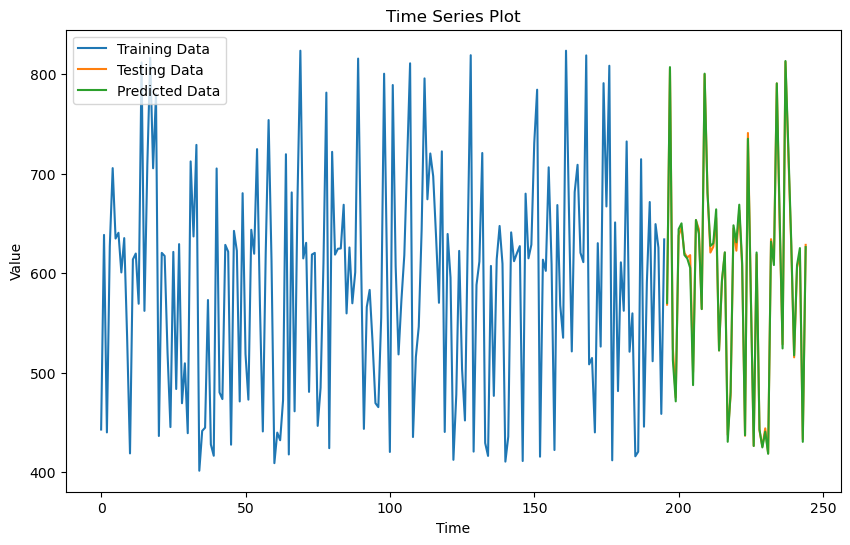

In [197]:
import matplotlib.pyplot as plt
import pandas as pd

# Time Series Plot
plt.figure(figsize=(10, 6))
plt.plot(np.arange(len(y_train)), y_train, label='Training Data')
plt.plot(np.arange(len(y_train), len(y_train) + len(y_test)), y_test, label='Testing Data')
plt.plot(np.arange(len(y_train), len(y_train) + len(y_test)), y_pred, label='Predicted Data')
plt.xlabel('Time')
plt.ylabel('Value')
plt.title('Time Series Plot')
plt.legend()
plt.show()


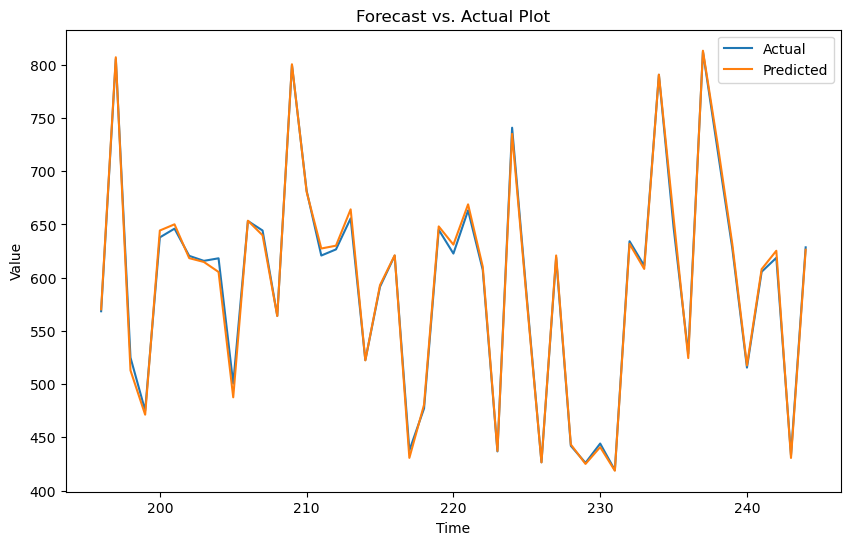

In [198]:
plt.figure(figsize=(10, 6))
plt.plot(np.arange(len(y_train), len(y_train) + len(y_test)), y_test, label='Actual')
plt.plot(np.arange(len(y_train), len(y_train) + len(y_test)), y_pred, label='Predicted')
plt.xlabel('Time')
plt.ylabel('Value')
plt.title('Forecast vs. Actual Plot')
plt.legend()
plt.show()

Shape of y_test: (49,)
Shape of y_pred: (49, 1)
Shape of y_pred after reshaping: (49,)


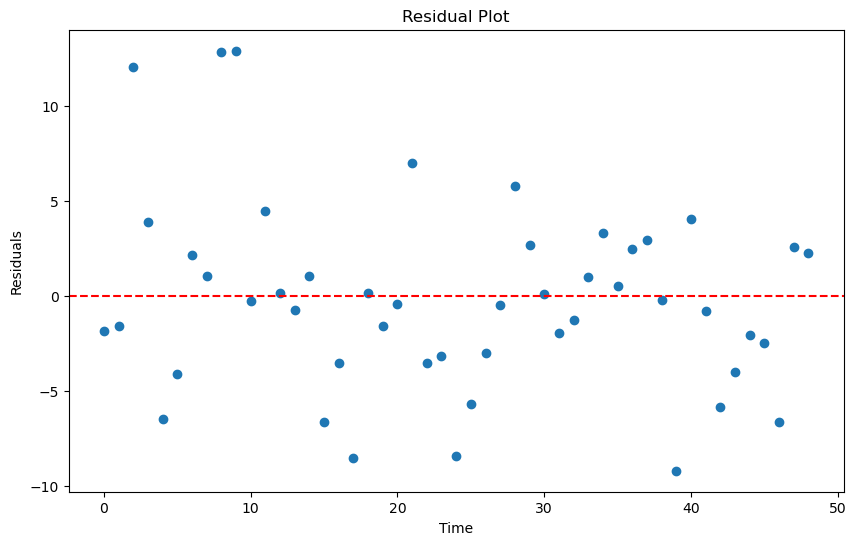

In [199]:
import numpy as np
import matplotlib.pyplot as plt

# Assuming y_test and y_pred are NumPy arrays
print("Shape of y_test:", y_test.shape)
print("Shape of y_pred:", y_pred.shape)

# Reshape y_pred to match the shape of y_test
y_pred = y_pred.reshape(-1)

# Check the shape of y_pred after reshaping
print("Shape of y_pred after reshaping:", y_pred.shape)

# Calculate residuals
residuals = y_test - y_pred

# Plot residuals
plt.figure(figsize=(10, 6))
plt.plot(np.arange(len(y_test)), residuals, marker='o', linestyle='None')
plt.xlabel('Time')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.axhline(y=0, color='r', linestyle='--')
plt.show()


Shape of residuals: (49,)
Shape of residuals after squeezing: (49,)


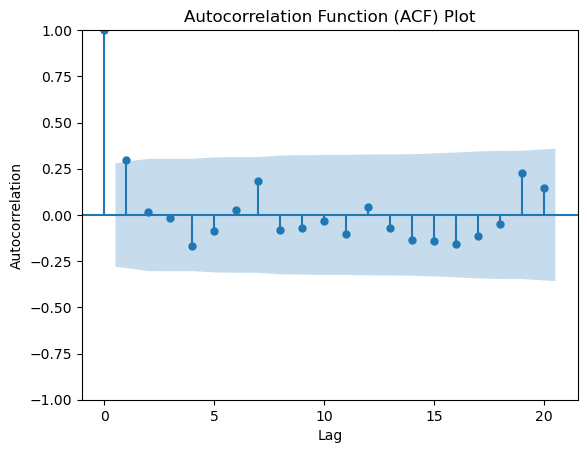

In [200]:
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf

# Assuming residuals is a NumPy array or a Pandas Series
print("Shape of residuals:", residuals.shape)

# Ensure residuals is 1-dimensional
residuals = residuals.squeeze()

# Check the shape of residuals after squeezing
print("Shape of residuals after squeezing:", residuals.shape)

# Plot autocorrelation function
plot_acf(residuals, lags=20)
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.title('Autocorrelation Function (ACF) Plot')
plt.show()


Shape of residuals: (49,)
Shape of residuals after squeezing: (49,)


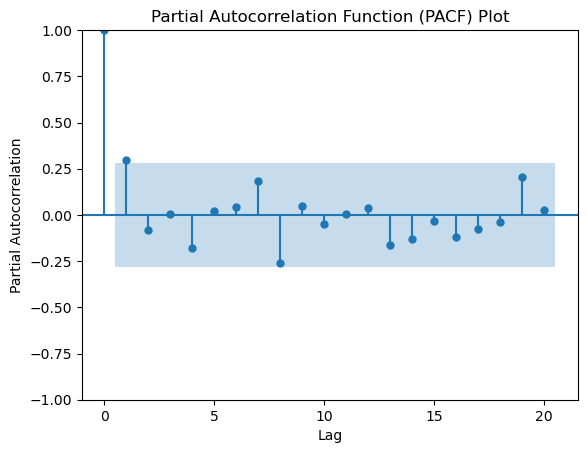

In [201]:
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_pacf

# Assuming residuals is a NumPy array or a Pandas Series
print("Shape of residuals:", residuals.shape)

# Ensure residuals is 1-dimensional
residuals = residuals.squeeze()

# Check the shape of residuals after squeezing
print("Shape of residuals after squeezing:", residuals.shape)

# Plot partial autocorrelation function
plot_pacf(residuals, lags=20)
plt.xlabel('Lag')
plt.ylabel('Partial Autocorrelation')
plt.title('Partial Autocorrelation Function (PACF) Plot')
plt.show()


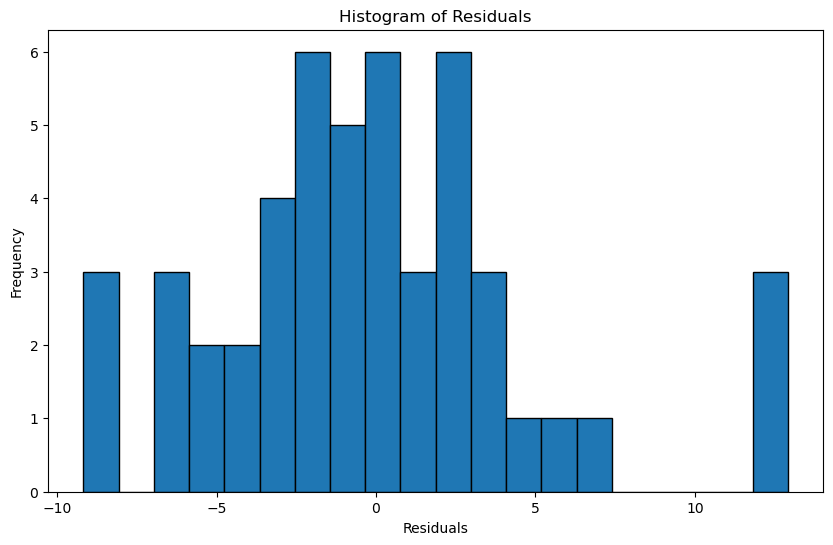

In [202]:
plt.figure(figsize=(10, 6))
plt.hist(residuals, bins=20, edgecolor='k')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Histogram of Residuals')
plt.show()

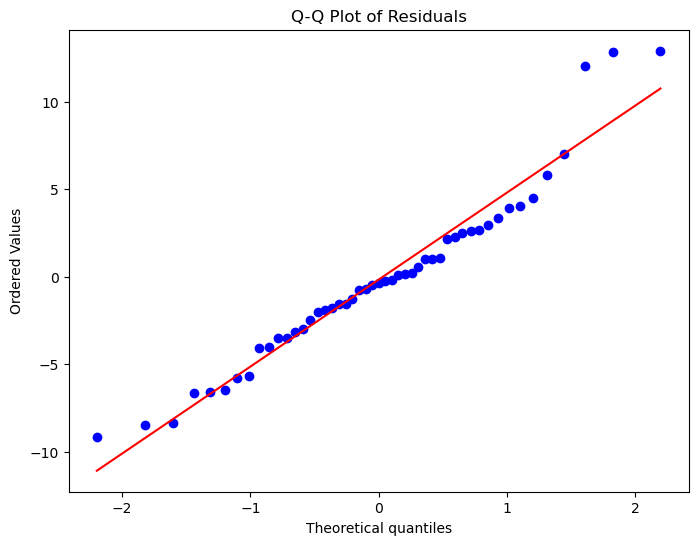

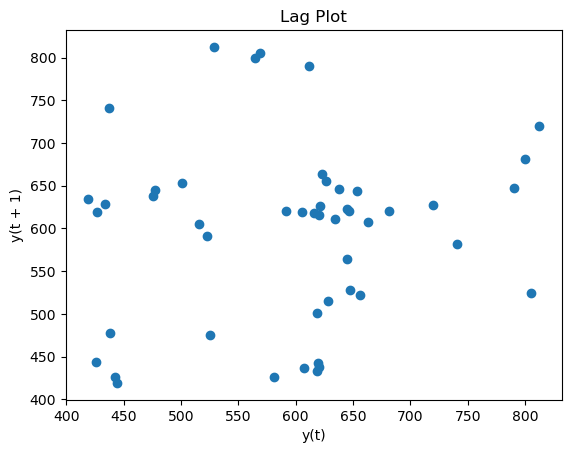

In [203]:
# Q-Q Plot of Residuals
import scipy.stats as stats
plt.figure(figsize=(8, 6))
stats.probplot(residuals, dist="norm", plot=plt)
plt.title('Q-Q Plot of Residuals')
plt.show()

# Lag Plot
from pandas.plotting import lag_plot
lag_plot(y_test)
plt.title('Lag Plot')
plt.show()